# Task 1

# Coverage analysis and plot

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("PupilBioTest_PMP_revA.csv")

# Clean column names to remove backticks
df.columns = df.columns.str.replace('`', '')

# Assuming the methylation columns are '000', '001', '010', '011', '100', '101', '110', '111'
methylation_columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# Group by Tissue and CpG_Coordinates
coverage_stats = []

for tissue, tissue_group in df.groupby('Tissue'):
    for cpg, cpg_group in tissue_group.groupby('CpG_Coordinates'):
        # Calculate coverage statistics for each CpG site in the tissue
        coverage_data = cpg_group[methylation_columns].sum(axis=1)  # Sum across methylation columns for coverage
        median_coverage = coverage_data.median()
        cv_coverage = coverage_data.std() / coverage_data.mean() if coverage_data.mean() != 0 else np.nan
        
        coverage_stats.append({
            'Tissue': tissue,
            'CpG_Coordinates': cpg,
            'Median_Coverage': median_coverage,
            'CV_Coverage': cv_coverage
        })

coverage_df = pd.DataFrame(coverage_stats)

# Display the coverage statistics
coverage_df.to_csv("coverage_df")
print(coverage_df.head())


  Tissue    CpG_Coordinates  Median_Coverage  CV_Coverage
0  Islet  10035:10044:10046            437.5     0.194897
1  Islet  10035:10044:10053            429.5     0.185998
2  Islet  10035:10044:10058            423.0     0.179751
3  Islet  10035:10044:10071            410.0     0.172090
4  Islet  10035:10044:10075            398.0     0.169980


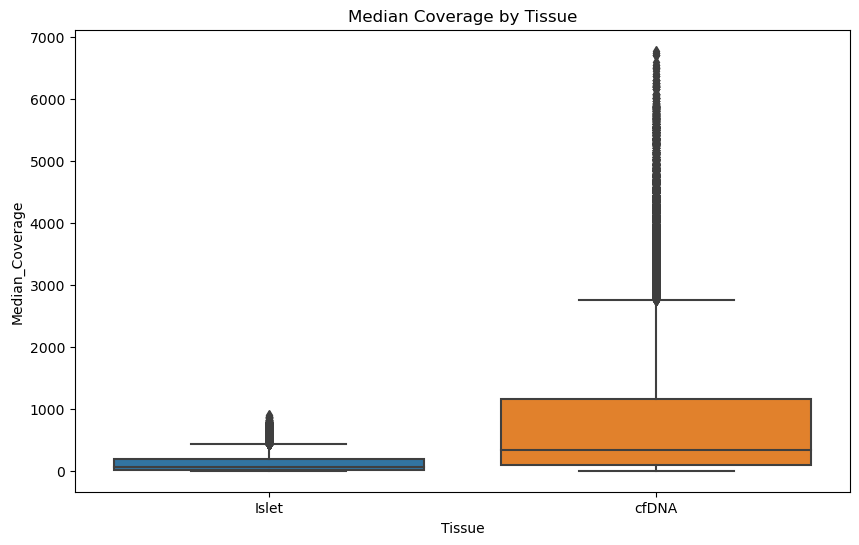

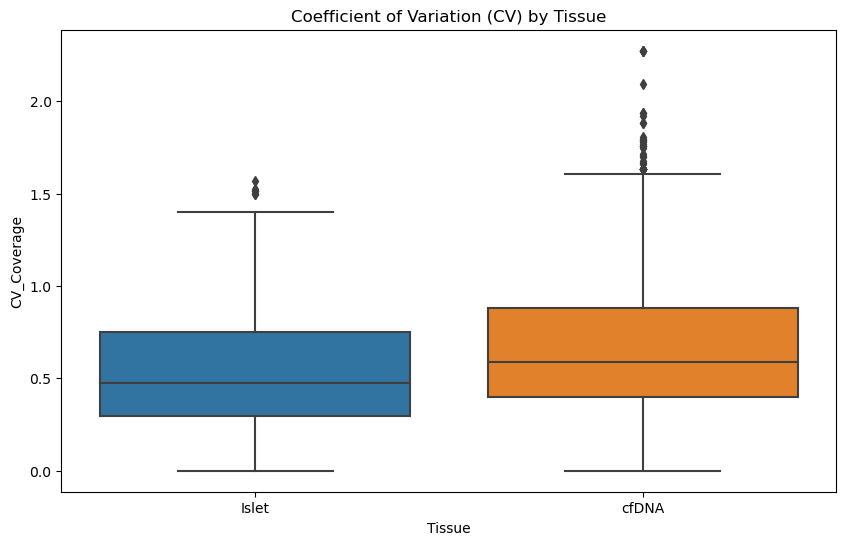

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Median Coverage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='Median_Coverage', data=coverage_df)
plt.title('Median Coverage by Tissue')
plt.show()

# Plot CV Coverage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='CV_Coverage', data=coverage_df)
plt.title('Coefficient of Variation (CV) by Tissue')
plt.show()


# Biomarker identification

In [41]:
import pandas as pd

# Load the coverage data (make sure to specify the correct file path)
coverage_df = pd.read_csv("./pupil_bio/coverage_df")  # Replace with the actual file path if needed

# Display the first few rows and column names to ensure correct columns are being used
print(coverage_df.columns)

# Define coverage threshold to determine methylation status
coverage_threshold = 400

# Create a synthetic 'Methylation_Status' based on coverage
coverage_df['Methylation_Status'] = coverage_df['Median_Coverage'].apply(lambda x: '1' if x > coverage_threshold else '0')

# Display the DataFrame with the newly added 'Methylation_Status' column
print(coverage_df.head())


Index(['Unnamed: 0', 'Tissue', 'CpG_Coordinates', 'Median_Coverage',
       'CV_Coverage'],
      dtype='object')
   Unnamed: 0 Tissue    CpG_Coordinates  Median_Coverage  CV_Coverage  \
0           0  Islet  10035:10044:10046            437.5     0.194897   
1           1  Islet  10035:10044:10053            429.5     0.185998   
2           2  Islet  10035:10044:10058            423.0     0.179751   
3           3  Islet  10035:10044:10071            410.0     0.172090   
4           4  Islet  10035:10044:10075            398.0     0.169980   

  Methylation_Status  
0                  1  
1                  1  
2                  1  
3                  1  
4                  0  


In [45]:
import pandas as pd

# Load the coverage data (make sure to specify the correct file path)
coverage_df = pd.read_csv("./pupil_bio/coverage_df")  # Replace with the actual file path if needed

# Display the first few rows and column names to ensure correct columns are being used
print(coverage_df.head())

# Ensure that 'Methylation_Status' exists in your dataset
# If 'Methylation_Status' does not exist, you can add it based on the coverage or another method
# For example, here we add it based on 'Median_Coverage'
coverage_df['Methylation_Status'] = coverage_df['Median_Coverage'].apply(lambda x: '1' if x > 400 else '0')

# Step 1: Split the 'CpG_Coordinates' into separate positions (CpG_1, CpG_2, CpG_3)
coverage_df[['CpG_1', 'CpG_2', 'CpG_3']] = coverage_df['CpG_Coordinates'].str.split(':', expand=True)

# Step 2: Combine methylation statuses into a string for each CpG position
coverage_df['PMP'] = coverage_df[['CpG_1', 'CpG_2', 'CpG_3']].astype(str).agg(':'.join, axis=1)

# Step 3: Group by 'Tissue' and 'PMP' to find the most common methylation pattern for each group
pmp_patterns = coverage_df.groupby(['Tissue', 'PMP'])['Methylation_Status'].agg(lambda x: x.mode()[0]).reset_index()

# Display the identified PMPs

# Save the result to a CSV file
pmp_patterns.to_csv('./pupil_bio/pmp_patterns.csv', index=False)
print(pmp_patterns)
# Optionally, print a message indicating that the file has been saved
print("Output saved to 'pmp_patterns.csv'")
print(pmp_patterns)


   Unnamed: 0 Tissue    CpG_Coordinates  Median_Coverage  CV_Coverage
0           0  Islet  10035:10044:10046            437.5     0.194897
1           1  Islet  10035:10044:10053            429.5     0.185998
2           2  Islet  10035:10044:10058            423.0     0.179751
3           3  Islet  10035:10044:10071            410.0     0.172090
4           4  Islet  10035:10044:10075            398.0     0.169980
       Tissue                PMP Methylation_Status
0       Islet  10035:10044:10046                  1
1       Islet  10035:10044:10053                  1
2       Islet  10035:10044:10058                  1
3       Islet  10035:10044:10071                  1
4       Islet  10035:10044:10075                  0
...       ...                ...                ...
131415  cfDNA   9998:10130:10140                  0
131416  cfDNA   9998:10130:10146                  0
131417  cfDNA   9998:10133:10140                  0
131418  cfDNA   9998:10133:10146                  0
131419  

# Calculating meand VRF of each PMP for both tissue

In [2]:
import pandas as pd

# Load the coverage data
coverage_df = pd.read_csv("./pupil_bio/coverage_df")  # Replace with the actual file path if needed
print("Columns in coverage_df:")
print(coverage_df.columns)

# Load the pmp_patterns.csv file which contains 'Methylation_Status'
pmp_pattern_existing = pd.read_csv("./pupil_bio/pmp_patterns.csv")  # Replace with the actual file path if needed

# Display the first few rows of the pmp_pattern.csv file to check its contents
print("\nColumns in pmp_pattern_existing:")
print(pmp_pattern_existing.columns)
print(pmp_pattern_existing.head())

# Step 1: Split the 'CpG_Coordinates' into separate positions (CpG_1, CpG_2, CpG_3)
coverage_df[['CpG_1', 'CpG_2', 'CpG_3']] = coverage_df['CpG_Coordinates'].str.split(':', expand=True)

# Step 2: Combine the CpG coordinates into a single PMP pattern (CpG_1:CpG_2:CpG_3)
coverage_df['PMP'] = coverage_df[['CpG_1', 'CpG_2', 'CpG_3']].astype(str).agg(':'.join, axis=1)

# Check the new column 'PMP' in coverage_df
print("\nUpdated coverage_df with PMP:")
print(coverage_df[['Tissue', 'CpG_Coordinates', 'PMP']].head())

# Step 3: Merge 'coverage_df' with 'pmp_pattern_existing' on both 'Tissue' and 'PMP'
coverage_df = pd.merge(coverage_df, pmp_pattern_existing[['Tissue', 'PMP', 'Methylation_Status']], on=['Tissue', 'PMP'], how='left')

# Check if the merge was successful
print("\nMerged coverage_df:")
print(coverage_df.head())

# Step 4: Calculate counts of each PMP pattern per tissue
pmp_counts = coverage_df.groupby(['Tissue', 'PMP'])['Methylation_Status'].size().reset_index(name='Count')

# Step 5: Calculate total counts of all PMP patterns across both tissues
total_counts = pmp_counts['Count'].sum()

# Step 6: Calculate Variant Relative Frequency (VRF) for each PMP pattern
pmp_counts['VRF'] = pmp_counts['Count'] / total_counts

# Step 7: Calculate mean VRF for each PMP across all tissues
mean_vrf_per_pmp = pmp_counts.groupby('PMP')['VRF'].mean().reset_index(name='Mean_VRF')

# Display the results
print("\nMean VRF for each PMP across tissues:")
print(mean_vrf_per_pmp)
mean_vrf_per_pmp.to_csv("./pupil_bio/mean_vrf_per_pmp")

Columns in coverage_df:
Index(['Unnamed: 0', 'Tissue', 'CpG_Coordinates', 'Median_Coverage',
       'CV_Coverage'],
      dtype='object')

Columns in pmp_pattern_existing:
Index(['Tissue', 'PMP', 'Methylation_Status'], dtype='object')
  Tissue                PMP  Methylation_Status
0  Islet  10035:10044:10046                   1
1  Islet  10035:10044:10053                   1
2  Islet  10035:10044:10058                   1
3  Islet  10035:10044:10071                   1
4  Islet  10035:10044:10075                   0

Updated coverage_df with PMP:
  Tissue    CpG_Coordinates                PMP
0  Islet  10035:10044:10046  10035:10044:10046
1  Islet  10035:10044:10053  10035:10044:10053
2  Islet  10035:10044:10058  10035:10044:10058
3  Islet  10035:10044:10071  10035:10044:10071
4  Islet  10035:10044:10075  10035:10044:10075

Merged coverage_df:
   Unnamed: 0 Tissue    CpG_Coordinates  Median_Coverage  CV_Coverage  CpG_1  \
0           0  Islet  10035:10044:10046            437.5     0.

## How does sequencing depth affect specificity confidence
### plot showing how specificity confidence changes with sequencing depth
### Specificity refers to how confidently we can assign a tissue's methylation status based on the coverage of that region.
### A higher sequencing depth means more reads for each CpG position, which generally leads to better confidence in methylation calls.

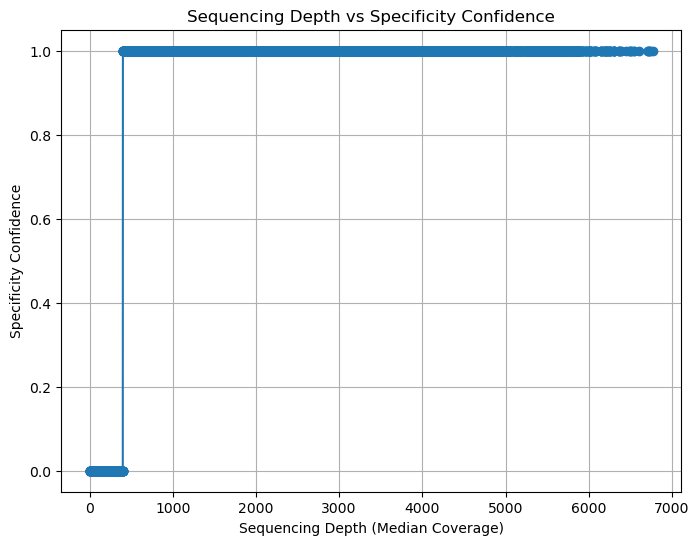

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the following columns exist: 'Tissue', 'PMP', 'Methylation_Status', 'Median_Coverage'
# Here, coverage_df already contains the necessary data

# Step 1: Calculate the specificity for each row (assumed to be 1 for correct calls, 0 for incorrect calls)
coverage_df['Specificity'] = (coverage_df['Methylation_Status'] == 1).astype(int)  # Assuming '1' is the correct methylation call

# Step 2: Analyze the correlation between sequencing depth (Median_Coverage) and specificity
depth_specificity = coverage_df.groupby('Median_Coverage')['Specificity'].mean().reset_index()

# Step 3: Plot the relationship between sequencing depth and specificity
plt.figure(figsize=(8, 6))
plt.plot(depth_specificity['Median_Coverage'], depth_specificity['Specificity'], marker='o')
plt.title("Sequencing Depth vs Specificity Confidence")
plt.xlabel("Sequencing Depth (Median Coverage)")
plt.ylabel("Specificity Confidence")
plt.grid(True)
plt.show()


In [4]:
# Step 1: Calculate the counts of each PMP
pmp_counts = coverage_df.groupby(['Tissue', 'PMP'])['Methylation_Status'].size().reset_index(name='Count')

# Step 2: Select the top 10 most frequent PMPs for Tissue #2 (you can adjust this based on your data)
top_10_pmp_tissue2 = pmp_counts[pmp_counts['Tissue'] == 'Tissue #2'].nlargest(10, 'Count')

# Step 3: Estimate the threshold for confident calling
# Assuming that a PMP with a certain number of reads (e.g., >90% of reads) should be confidently called
threshold = 0.5 * top_10_pmp_tissue2['Count'].max()  # For example, 90% of the max count

print("\nTop 10 PMPs for Tissue #2:")
print(top_10_pmp_tissue2)

print("\nEstimated threshold for confident calling (90% of max reads):")
print(threshold)



Top 10 PMPs for Tissue #2:
Empty DataFrame
Columns: [Tissue, PMP, Count]
Index: []

Estimated threshold for confident calling (90% of max reads):
nan


##  Validate this hypothesis by comparing the specificity of top 10 PMPs against individual CpG sites.

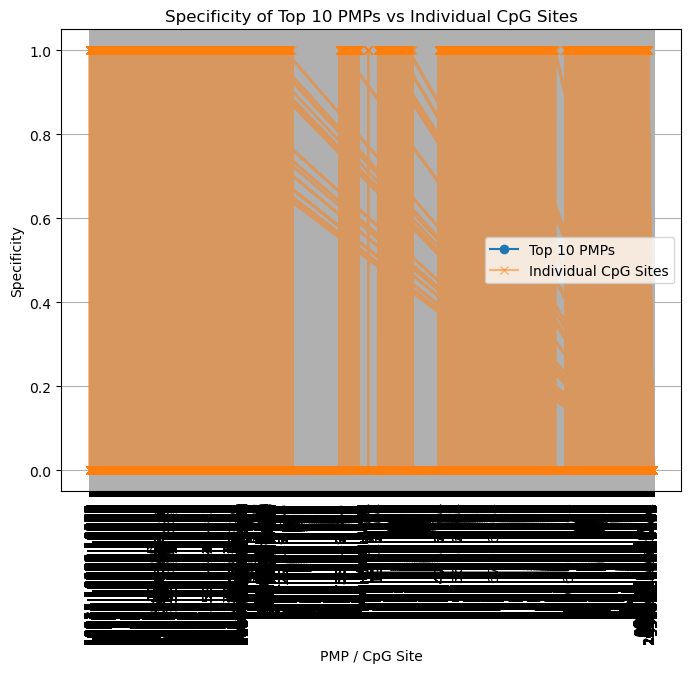

In [5]:
# Step 1: Calculate the specificity for individual CpG sites (compare Methylation_Status for each CpG)
coverage_df['Specificity_CpG'] = (coverage_df['Methylation_Status'] == 1).astype(int)

# Step 2: Group by individual CpG sites and calculate the specificity for each site
specificity_per_cpg = coverage_df.groupby(['Tissue', 'CpG_Coordinates'])['Specificity_CpG'].mean().reset_index()

# Step 3: Focus on the top 10 PMPs from Tissue #2
top_10_pmp_specificity = coverage_df[coverage_df['PMP'].isin(top_10_pmp_tissue2['PMP'])]

# Step 4: Compare specificity of top 10 PMPs against individual CpG sites
top_10_pmp_specificity = top_10_pmp_specificity.groupby(['Tissue', 'PMP'])['Specificity_CpG'].mean().reset_index()

# Step 5: Plot the comparison between the top 10 PMPs and individual CpG specificity
plt.figure(figsize=(8, 6))
plt.plot(top_10_pmp_specificity['PMP'], top_10_pmp_specificity['Specificity_CpG'], marker='o', label='Top 10 PMPs')
plt.plot(specificity_per_cpg['CpG_Coordinates'], specificity_per_cpg['Specificity_CpG'], marker='x', label='Individual CpG Sites', alpha=0.5)
plt.title("Specificity of Top 10 PMPs vs Individual CpG Sites")
plt.xlabel("PMP / CpG Site")
plt.ylabel("Specificity")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


# Task 2

# Quality checking

In [2]:
# Step 2: Run FastQC on filtered FASTQ file for quality control
!conda install -c bioconda fastp -y 

Channels:
 - bioconda
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [1]:
# Healthy sample file paths
healthy_input_r1 = "/home/vaibhavi-jain/Downloads/pupil_bio/PA221MH-lib09-P19-Norm_S1_L001_R1_001.fastq.gz"
healthy_input_r2 = "/home/vaibhavi-jain/Downloads/pupil_bio/PA221MH-lib09-P19-Norm_S1_L001_R2_001.fastq.gz"

# Tumor sample file paths
tumor_input_r1 = "/home/vaibhavi-jain/Downloads/pupil_bio/PA220KH-lib09-P19-Tumor_S2_L001_R1_001.fastq.gz"
tumor_input_r2 = "/home/vaibhavi-jain/Downloads/pupil_bio/PA220KH-lib09-P19-Tumor_S2_L001_R2_001.fastq.gz"

# Output directories
healthy_output_dir = "./pupil_bio/fastp_healthy/"
tumor_output_dir = "./pupil_bio/fastp_tumor/"

# Create output directories
!mkdir -p {healthy_output_dir}
!mkdir -p {tumor_output_dir}

# Run fastp for the healthy sample
!fastp \
    -i {healthy_input_r1} \
    -I {healthy_input_r2} \
    -o {healthy_output_dir}/processed_healthy_1.fastq \
    -O {healthy_output_dir}/processed_healthy_2.fastq \
    -h {healthy_output_dir}/fastp_report.html \
    -j {healthy_output_dir}/fastp_report.json

# Run fastp for the tumor sample
!fastp \
    -i {tumor_input_r1} \
    -I {tumor_input_r2} \
    -o {tumor_output_dir}/processed_tumor_1.fastq \
    -O {tumor_output_dir}/processed_tumor_2.fastq \
    -h {tumor_output_dir}/fastp_report.html \
    -j {tumor_output_dir}/fastp_report.json

Read1 before filtering:
total reads: 2574922
total bases: 388813222
Q20 bases: 382217357(98.3036%)
Q30 bases: 371715114(95.6025%)

Read2 before filtering:
total reads: 2574922
total bases: 388813222
Q20 bases: 378390274(97.3193%)
Q30 bases: 365243100(93.9379%)

Read1 after filtering:
total reads: 2530059
total bases: 352099444
Q20 bases: 347751203(98.7651%)
Q30 bases: 339157199(96.3243%)

Read2 after filtering:
total reads: 2530059
total bases: 352099444
Q20 bases: 346077004(98.2896%)
Q30 bases: 335638308(95.3249%)

Filtering result:
reads passed filter: 5060118
reads failed due to low quality: 89726
reads failed due to too many N: 0
reads failed due to too short: 0
reads with adapter trimmed: 4238370
bases trimmed due to adapters: 60026942

Duplication rate: 87.458%

Insert size peak (evaluated by paired-end reads): 150

JSON report: ./pupil_bio/fastp_healthy//fastp_report.json
HTML report: ./pupil_bio/fastp_healthy//fastp_report.html

fastp -i /home/vaibhavi-jain/Downloads/pupil_bio/

In [2]:
!wget ftp://ftp.ensembl.org/pub/release-109/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz

--2025-01-11 20:31:36--  ftp://ftp.ensembl.org/pub/release-109/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz
           => ‘Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-109/fasta/homo_sapiens/dna ... done.
==> SIZE Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz ... 881211416
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz ... done.
Length: 881211416 (840M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>] 840.39M  3.29MB/s    in 6m 3s   

2025-01-11 20:37:42 (2.31 MB/s) - ‘Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz’ saved [881211416]



# Alignment and muation calling

In [41]:
!bowtie2-build --large-index /home/vaibhavi-jain/Downloads/pupil_bio/indexes/Homo_sapiens.GRCh38.dna.primary_assembly /home/vaibhavi-jain/Downloads/pupil_bio/indexes/Homo_sapiens_GRCh38


Settings:
  Output files: "/home/vaibhavi-jain/Downloads/pupil_bio/indexes/Homo_sapiens_GRCh38.*.bt2l"
  Line rate: 7 (line is 128 bytes)
  Lines per side: 1 (side is 128 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /home/vaibhavi-jain/Downloads/pupil_bio/indexes/Homo_sapiens.GRCh38.dna.primary_assembly
Building a LARGE index
Reading reference sizes
  Time reading reference sizes: 00:00:49
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:01:12
bmax according to bmaxDivN setting: 736462266
Using parameters --bmax 552346700 --dcv 1024
 

In [3]:

# Align normal samples
!bowtie2 -x /home/vaibhavi-jain/Downloads/pupil_bio/indexes/Homo_sapiens.GRCh38 \
    -1 /home/vaibhavi-jain/Downloads/pupil_bio/fastp_healthy/processed_healthy_1.fastq \
    -2 /home/vaibhavi-jain/Downloads/pupil_bio/fastp_healthy/processed_healthy_2.fastq \
    -S /home/vaibhavi-jain/Downloads/pupil_bio/healthy_samples_aligned.sam

# Align disease samples
!bowtie2 -x /home/vaibhavi-jain/Downloads/pupil_bio/indexes/Homo_sapiens.GRCh38 \
    -1 /home/vaibhavi-jain/Downloads/pupil_bio/fastp_tumor/processed_tumor_1.fastq \
    -2 /home/vaibhavi-jain/Downloads/pupil_bio/fastp_tumor/processed_tumor_2.fastq \
    -S /home/vaibhavi-jain/Downloads/pupil_bio/disease_samples_aligned.sam


2530059 reads; of these:
  2530059 (100.00%) were paired; of these:
    39215 (1.55%) aligned concordantly 0 times
    2064240 (81.59%) aligned concordantly exactly 1 time
    426604 (16.86%) aligned concordantly >1 times
    ----
    39215 pairs aligned concordantly 0 times; of these:
      9901 (25.25%) aligned discordantly 1 time
    ----
    29314 pairs aligned 0 times concordantly or discordantly; of these:
      58628 mates make up the pairs; of these:
        46754 (79.75%) aligned 0 times
        10385 (17.71%) aligned exactly 1 time
        1489 (2.54%) aligned >1 times
99.08% overall alignment rate
2340574 reads; of these:
  2340574 (100.00%) were paired; of these:
    27782 (1.19%) aligned concordantly 0 times
    1912667 (81.72%) aligned concordantly exactly 1 time
    400125 (17.10%) aligned concordantly >1 times
    ----
    27782 pairs aligned concordantly 0 times; of these:
      9659 (34.77%) aligned discordantly 1 time
    ----
    18123 pairs aligned 0 times concorda

In [2]:
# Convert SAM to BAM
!samtools view -S -b ./pupil_bio/healthy_samples_aligned.sam -o ./pupil_bio/healthy.bam


In [3]:
# Convert SAM to BAM
!samtools view -S -b ./pupil_bio/disease_samples_aligned.sam -o ./pupil_bio/disease.bam


In [4]:
pip install pysam

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pysam

# Paths
input_bam = "./pupil_bio/healthy.bam"  # Input unsorted BAM
output_bam = "./pupil_bio/healthy_sorted.bam"   # Output sorted BAM

# Sort BAM file
pysam.sort("-o", output_bam, input_bam)

# Index the sorted BAM file
pysam.index(output_bam)

print(f"Sorted and indexed BAM file saved as: {output_bam}")


Sorted and indexed BAM file saved as: ./pupil_bio/healthy_sorted.bam


In [6]:
import pysam

# Paths
input_bam = "./pupil_bio/disease.bam"  # Input unsorted BAM
output_bam = "./pupil_bio/disease_sorted.bam"   # Output sorted BAM

# Sort BAM file
pysam.sort("-o", output_bam, input_bam)

# Index the sorted BAM file
pysam.index(output_bam)

print(f"Sorted and indexed BAM file saved as: {output_bam}")


Sorted and indexed BAM file saved as: ./pupil_bio/disease_sorted.bam


In [ ]:
samtools mpileup -f ./pupil_bio/indexes/Homo_sapiens.GRCh38.dna.primary_assembly.fa ./pupil_bio/healthy_sorted.bam > healthy.pileup

In [ ]:
samtools mpileup -f ./pupil_bio/indexes/Homo_sapiens.GRCh38.dna.primary_assembly.fa ./pupil_bio/disease_sorted.bam > disease.pileup

In [5]:
!java -jar /home/vaibhavi-jain/Downloads/VarScan.v2.4.6.jar somatic ./pupil_bio/normal.pileup ./pupil_bio/tumor.pileup ./pupil_bio/somatic_output --output-vcf 1

Normal Pileup: ./pupil_bio/normal.pileup
Tumor Pileup: ./pupil_bio/tumor.pileup
NOTICE: While dual input files are still supported, using a single mpileup file (normal-tumor) with the --mpileup 1 setting is strongly recommended.
Min coverage:	8x for Normal, 6x for Tumor
Min reads2:	2
Min strands2:	1
Min var freq:	0.2
Min freq for hom:	0.75
Normal purity:	1.0
Tumor purity:	1.0
Min avg qual:	15
P-value thresh:	0.99
Somatic p-value:	0.05
64637 positions in tumor
60725 positions shared in normal
30759 had sufficient coverage for comparison
30639 were called Reference
0 were mixed SNP-indel calls and filtered
114 were called Germline
2 were called LOH
4 were called Somatic
0 were called Unknown
0 were called Variant


In [1]:
!samtools faidx ./pupil_bio/indexes/Homo_sapiens.GRCh38.dna.primary_assembly.fa

In [12]:
import pandas as pd

# Step 1: Parse VarScan VCF Output
vcf_file = './pupil_bio/somatic_output.snp.vcf'
somatic_mutations = []
background_mutations = []

with open(vcf_file, 'r') as file:
    for line in file:
        if not line.startswith('#'):  # Skip headers
            cols = line.strip().split('\t')
            chrom = cols[0]
            pos = int(cols[1])
            ref = cols[3]
            alt = cols[4]
            filter_status = cols[6]
            info = {item.split('=')[0]: item.split('=')[1] if '=' in item else True for item in cols[7].split(';')}
            somatic_flag = 'SOMATIC' in info
            ss = int(info.get('SS', -1))  # Somatic status: 2 = Somatic, 1 = Germline, etc.

            if somatic_flag and ss == 2:
                somatic_mutations.append((chrom, pos, ref, alt))
            else:
                background_mutations.append((chrom, pos, ref, alt))

# Convert to DataFrames
somatic_df = pd.DataFrame(somatic_mutations, columns=['Chromosome', 'Position', 'Reference', 'Alternate'])
background_df = pd.DataFrame(background_mutations, columns=['Chromosome', 'Position', 'Reference', 'Alternate'])

# Step 2: Load Reference Data (Optional for Annotation)
reference_file = './pupil_bio/PANCAN_PDAC_100plex_ref.csv'
reference_data = pd.read_csv(reference_file)
reference_data.columns = ['ID', 'Sequence', 'Len', 'Gene', 'Chromosome', 'Absolute Start', 'Absolute End']

# Annotate Somatic Mutations
somatic_df['Chromosome'] = somatic_df['Chromosome'].apply(lambda x: f"chr{x}" if not x.startswith('chr') else x)
annotated_somatic = somatic_df.merge(
    reference_data,
    how='left',
    left_on=['Chromosome', 'Position'],
    right_on=['Chromosome', 'Absolute Start']
)

# Annotate Background Mutations
background_df['Chromosome'] = background_df['Chromosome'].apply(lambda x: f"chr{x}" if not x.startswith('chr') else x)
annotated_background = background_df.merge(
    reference_data,
    how='left',
    left_on=['Chromosome', 'Position'],
    right_on=['Chromosome', 'Absolute Start']
)

# Step 3: Estimate Background Mutation Level
total_positions = len(somatic_mutations) + len(background_mutations)
background_mutation_level = len(background_mutations) / total_positions

# Step 4: Save Outputs
somatic_output_file = './pupil_bio/annotated_somatic_mutations.csv'
background_output_file = './pupil_bio/annotated_background_mutations.csv'

annotated_somatic.to_csv(somatic_output_file, index=False)
annotated_background.to_csv(background_output_file, index=False)

# Print Summary
print(f"Somatic mutations: {len(somatic_mutations)}")
print(f"Background mutations: {len(background_mutations)}")
print(f"Background Mutation Level: {background_mutation_level:.4f}")
print(f"Annotated somatic mutations saved to '{somatic_output_file}'")
print(f"Annotated background mutations saved to '{background_output_file}'")


Somatic mutations: 1
Background mutations: 98
Background Mutation Level: 0.9899
Annotated somatic mutations saved to './pupil_bio/annotated_somatic_mutations.csv'
Annotated background mutations saved to './pupil_bio/annotated_background_mutations.csv'


In [14]:
import pandas as pd
import numpy as np

# Function to parse pileup data and detect mutations
def parse_pileup(pileup_file):
    mutations = []
    
    with open(pileup_file, 'r') as file:
        for line in file:
            columns = line.strip().split('\t')
            chrom, pos, ref, coverage, bases, base_qualities = columns[0], int(columns[1]), columns[2], int(columns[3]), columns[4], columns[5]
            
            # Filter out low coverage sites
            if coverage < 10:
                continue
            
            ref_count = bases.count(ref)
            mutation_count = len(bases) - ref_count  # Mutations are non-reference bases

            if mutation_count > 0:
                mutations.append({
                    'Chromosome': chrom,
                    'Position': pos,
                    'Reference': ref,
                    'Total Coverage': coverage,
                    'Mutation Count': mutation_count
                })
                
    return pd.DataFrame(mutations)

# Load normal pileup data
normal_pileup_file = './pupil_bio/normal.pileup'
mutations_df = parse_pileup(normal_pileup_file)

# Step 1: Calculate Background Mutation Level
# Background mutation level = (number of mutations in normal tissue) / (total coverage in normal tissue)
mutations_df['Mutation Rate'] = mutations_df['Mutation Count'] / mutations_df['Total Coverage']
median_mutation_rate = np.median(mutations_df['Mutation Rate'])

print(f"Median Background Mutation Rate in Normal Tissue: {median_mutation_rate}")

# Step 2: Calculate the number of reads per million required to confidently call a mutation
# Assuming a mutation is confidently called if the mutation frequency (mutation count / total coverage) is above a threshold (e.g., 5%).
mutation_frequency_threshold = 0.05  # 5% mutation frequency required

# Calculate the required total reads to confidently call a mutation
required_coverage = mutation_frequency_threshold * 1000000  # Reads per million
print(f"Reads per million required to confidently call a mutation: {required_coverage}")

# Optional: Save results for later use
mutations_df.to_csv('./pupil_bio/background_mutation_levels.csv', index=False)


Median Background Mutation Rate in Normal Tissue: 1.0
Reads per million required to confidently call a mutation: 50000.0
